In [1]:
! pip install firebase_admin

ERROR: grpcio-status 1.43.0 has requirement grpcio>=1.43.0, but you'll have grpcio 1.41.0 which is incompatible.
ERROR: proto-plus 1.19.8 has requirement protobuf>=3.19.0, but you'll have protobuf 3.18.1 which is incompatible.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from datetime       import datetime, timedelta
from firebase_admin import db, credentials, initialize_app

import pandas               as pd
import matplotlib.pyplot    as plt

## Retreiving Data from Firebase

In [8]:
cred_obj     = credentials.Certificate('key.json')
database_url = "https://iot-project-183-default-rtdb.firebaseio.com/"

default_app = initialize_app(
    cred_obj, 
    {'databaseURL': database_url})


ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [ ]:
data = db.reference("/data").get()

In [ ]:
df = pd.DataFrame(data.values())

In [9]:
df.head(10)

,humidity,temp,timestamp
0,37.000000,24.000000,1640939943436
1,47.000000,24.000000,1640940025968
2,36.000000,20.000000,1640940091389
3,19.000000,20.000000,1640940393790
4,21.000000,20.000000,1640940696551
5,33.000000,24.000000,1640940999145
6,34.000000,21.000000,1640941301761
7,-1.214748,-1.214748,1640941492484
8,-1.214748,-1.214748,1640941532915
9,-1.214748,-1.214748,1640941574671


## Changing Timestamps to DateTime objects

In [10]:
def timestamp_to_datetime(timestamp):

  return datetime.fromtimestamp(timestamp / 1000) + timedelta(hours=5)

In [11]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [12]:
df.head(10)

,humidity,temp,timestamp
0,37.000000,24.000000,2021-12-31 18:39:03.436
1,47.000000,24.000000,2021-12-31 18:40:25.968
2,36.000000,20.000000,2021-12-31 18:41:31.389
3,19.000000,20.000000,2021-12-31 18:46:33.790
4,21.000000,20.000000,2021-12-31 18:51:36.551
5,33.000000,24.000000,2021-12-31 18:56:39.145
6,34.000000,21.000000,2021-12-31 19:01:41.761
7,-1.214748,-1.214748,2021-12-31 19:04:52.484
8,-1.214748,-1.214748,2021-12-31 19:05:32.915
9,-1.214748,-1.214748,2021-12-31 19:06:14.671


## Making Datetime the index of dataframe

In [13]:
df.set_index('timestamp', inplace=True)

In [14]:
df.head(10)

,humidity,temp
timestamp,,
2021-12-31 18:39:03.436,37.000000,24.000000
2021-12-31 18:40:25.968,47.000000,24.000000
2021-12-31 18:41:31.389,36.000000,20.000000
2021-12-31 18:46:33.790,19.000000,20.000000
2021-12-31 18:51:36.551,21.000000,20.000000
2021-12-31 18:56:39.145,33.000000,24.000000
2021-12-31 19:01:41.761,34.000000,21.000000
2021-12-31 19:04:52.484,-1.214748,-1.214748
2021-12-31 19:05:32.915,-1.214748,-1.214748


## Resamapling data to a frequency of 5 minutes

In [15]:
resampled_df = pd.DataFrame()

In [21]:
resampled_df['humidity']  = df['humidity'].resample('5Min').mean()
resampled_df['temp']       = df['temp'].resample('5Min').mean()

In [22]:
resampled_df.head(15)

,humimdity,temp,humidity
timestamp,,,
2021-12-31 18:35:00,37.000000,24.000000,37.000000
2021-12-31 18:40:00,41.500000,22.000000,41.500000
2021-12-31 18:45:00,19.000000,20.000000,19.000000
2021-12-31 18:50:00,21.000000,20.000000,21.000000
2021-12-31 18:55:00,33.000000,24.000000,33.000000
2021-12-31 19:00:00,16.392626,9.892626,16.392626
2021-12-31 19:05:00,1.856834,11.856834,1.856834
2021-12-31 19:10:00,15.000000,29.000000,15.000000
2021-12-31 19:15:00,18.000000,22.000000,18.000000


## Checking for NaN values in data

In [23]:
# resampled_df.dropna(inplace=True)
resampled_df[resampled_df.isnull().any(axis=1)]

,humimdity,temp,humidity
timestamp,,,
2022-01-01 01:55:00,NaN,NaN,NaN
2022-01-01 06:55:00,NaN,NaN,NaN
2022-01-01 07:00:00,NaN,NaN,NaN
2022-01-01 07:05:00,NaN,NaN,NaN
2022-01-01 07:10:00,NaN,NaN,NaN
2022-01-01 08:35:00,NaN,NaN,NaN
2022-01-01 16:00:00,NaN,NaN,NaN


## Plotting data

<AxesSubplot:xlabel='timestamp'>

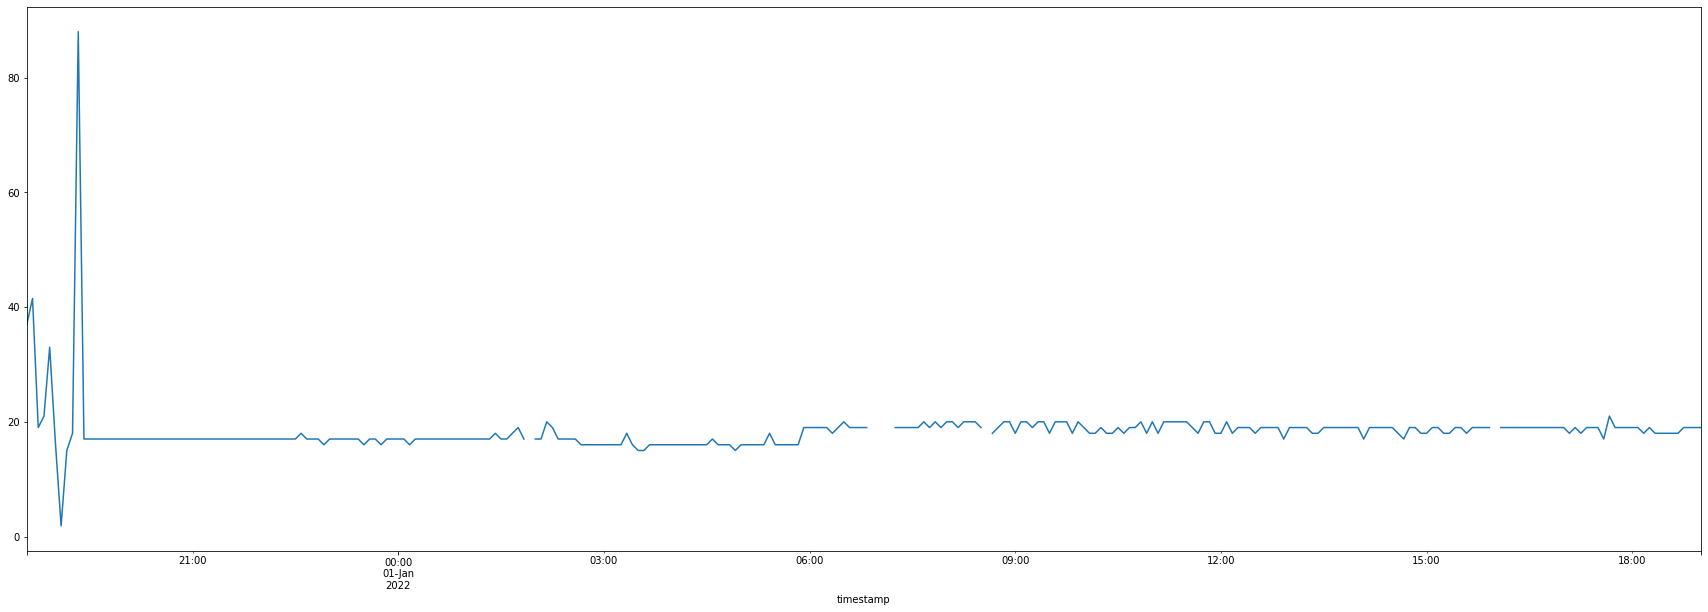

In [29]:
plt.figure(figsize=(30, 10))
resampled_df['humidity'].plot()

<AxesSubplot:xlabel='timestamp'>

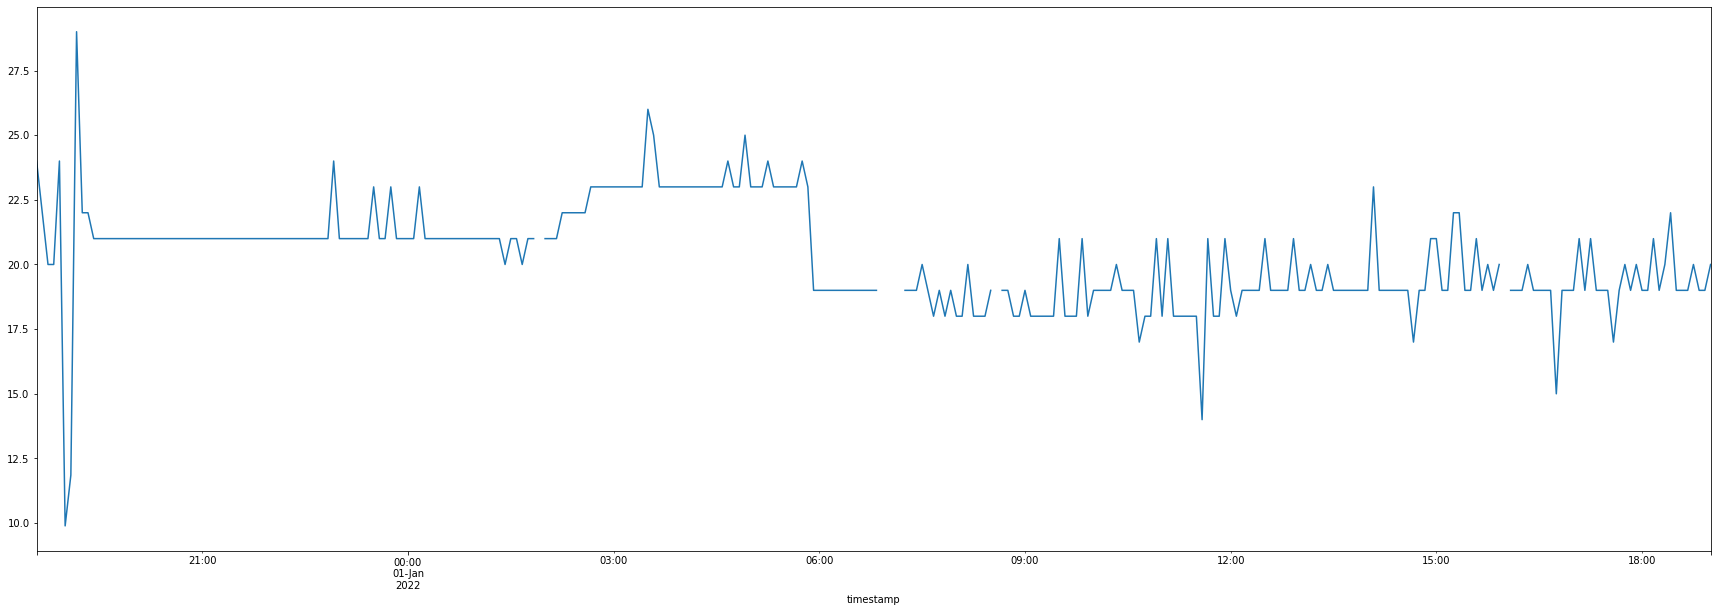

In [27]:
plt.figure(figsize=(30, 10))
resampled_df['temp'].plot()